In [ ]:
!pip install torch torchvision

In [ ]:
import numpy as np
import torch as T
import torch.nn as nn
import torch.nn.functional as F
from torch.utils import data
import torch.optim as optim
from torchvision.models.resnet import resnet18
import cv2
#from skimage.io import imread
import matplotlib.pyplot as plt

import json
from PIL import Image
import random
from sklearn.preprocessing import MinMaxScaler

from google.colab import drive
drive.mount('/content/drive')

import sklearn.metrics as metrics

Mounted at /content/drive


In [ ]:
def coord2grid(grid, Y, w, h, x, y, img_size = 224, grid_size = 20, distance = 200): 
    # length = Ys.shape[0]

    x_left = x
    y_up = y
    x_right = x + w
    y_down = y + h

    size_factor = img_size / grid_size

    grid_x_left = int(x_left // size_factor)
    grid_y_up = int(y_up // size_factor)
    grid_x_right = int(x_right // size_factor)
    grid_y_down = int(y_down // size_factor)

    for xx in range(grid_x_left, grid_x_right + 1):
      for yy in range(grid_y_up, grid_y_down + 1):
        grid[0,0, xx, yy] = distance

    return grid

def grid2coord(distance, img_size = 224, img = None):
    # if np.nan:
    #     base = np.zeros([clss.shape[0], img_size, img_size, 3])
    # else:
    # base = img
    base = np.ascontiguousarray(img.copy(), dtype=float)

    grid_size = len(distance[0][0])
    
    size_factor = img_size / grid_size

    r=0; g=0; b=0

    for x in range(1, grid_size):
        for y in range(img_size):
            base[int(x*size_factor)][y] = 0

    for y in range(1, grid_size):
        for x in range(img_size):
            base[x][int(y*size_factor)] = 0

    for x in range(grid_size):
        for y in range(grid_size): 
            xx = int((x+0/5)*size_factor)
            yy = int((y+0/5)*size_factor)
            text = '{0}, {1}'. format(x, y)
            cv2.putText(base, text, (xx, yy), cv2.FONT_HERSHEY_SIMPLEX, 0.1,(r,g,b), 1)


    return base

In [ ]:
file_list = list()
index = 0

In [ ]:
class picture_data(data.Dataset):
    def __init__(self, n=100, grid_size = 20, train = True, first = 0, last = 350):

        self.n = n
        self.grid_size = grid_size
        self.train = train
        self.first = first
        self.last = last

    def __len__(self):
        return self.n

    def __getitem__(self, idx):

        if self.train:
            global file_list

            if not file_list:
                file_list = list(range(self.first, self.last + 1))

            ranind = random.randrange(0, len(file_list))
            self.file = file_list.pop(ranind)

        else:
            global index
 
            if not index: index = self.first
            self.file = index
            index = (index+1-self.first)%(self.last - self.first + 1) + self.first



        self.image = '/content/drive/Shareddrives/Science_Research/Picture_file2/{0}'.format(self.file)  #뭔가 이상. 숫자 바꾸면서 하면 차례대로 잘 넣을 수 있지 않을까...

        self.picture = json.load(open('%s.json' % self.image, encoding='utf-8')) #사진 업로드
        self.shapes = self.picture["shapes"]
        self.Width_rate = self.picture["imageWidth"]/224 
        self.Height_rate = self.picture["imageHeight"]/224

        img = Image.open("%s.jpg" %self.image)
        img_224 = img.resize((224,224)) #이미지 크기를 224 x 224로 변환 / 요거 필터 한번 바꿔봐야징 ㅎㅎ
        X = np.array(img_224)

        grid = np.full([1, 1, self.grid_size, self.grid_size],200, dtype=float)

        if self.file <= 19:
          for i in range(3, 18):
            grid[0, 0, 13, i] = 130
          for i in range(4, 17):
            grid[0, 0, 14, i] = 130
          for i in range(15, 20):
            grid[0, 0, i, 8] =130
          for i in range(15, 18):
            grid[0, 0, i ,15] =130
          for i in range(16, 20):
            grid[0, 0, i, 16] =130
          grid[0, 0, 19, 9] =130
          grid[0, 0, 15, 7] = 130

        elif self.file <= 74:
          for i in range(3, 18):
            grid[0, 0, 13, i] = 130
          for i in range(3, 18):
            grid[0, 0, 14, i] = 130
          for i in range(15, 20):
            grid[0, 0, i, 8] =130
          for i in range(15, 18):
            grid[0, 0, i, 7] =130
          for i in range(15, 19):
            grid[0, 0, i, 15] =130
          for i in range(17, 20):
            grid[0, 0, i, 16]
          grid[0, 0, 19, 9] =130
          grid[0, 0, 19, 14] = 130

        elif self.file <= 153:
          for i in range(2, 17):
            grid[0, 0, 14, i] = 130
          for i in range(2, 16):
            grid[0, 0, 15, i] = 130
          for i in range(16, 19):
            grid[0, 0, i, 6] =130  
          for i in range(16, 20):
            grid[0, 0, i ,7] =130
          for i in range(15, 20):
            grid[0, 0, i, 14] =130
          grid[0, 0, 19, 8] =130
          grid[0, 0, 19, 15] = 130
          
        elif self.file <= 179:
          for i in range(2, 17):
            grid[0, 0, 13, i] = 130
          for i in range(2, 16):
            grid[0, 0, 14, i] = 130
          for i in range(15, 18):
            grid[0, 0, i, 6] =130
          for i in range(15, 20):
            grid[0, 0, i, 7] =130
          for i in range(15, 20):
            grid[0, 0, i, 14] =130
          grid[0, 0, 19, 8] =130
          grid[0, 0, 19, 15] = 130
          grid[0, 0, 15, 13] = 130
        
        elif self.file <= 310:
          for i in range(2, 5):
            grid[0, 0, 13, i] = 130
          for i in range(3, 17):
            grid[0, 0, 14, i] = 130
          for i in range(15, 20):
            grid[0, 0, i, 7] =130
          for i in range(15, 20):
            grid[0, 0, i, 14] =130
          for i in range(17, 20):
            grid[0, 0, i, 15] =130
          grid[0, 0, 19, 8] =130
          grid[0, 0, 15, 6] = 130
          grid[0, 0, 15, 15] = 130

        elif self.file <= 332:
          for i in range(2, 17):
            grid[0, 0, 13, i] = 130
          for i in range(3, 17):
            grid[0, 0, 14, i] = 130
          for i in range(15, 20):
            grid[0, 0, i, 7] =130
          for i in range(15, 18):
            grid[0, 0, i, 14] =130
          for i in range(16, 20):
            grid[0, 0, i, 15] =130
          grid[0, 0, 15, 6] = 130
          grid[0, 0, 19, 8] = 130

        elif self.file <= 410:
          for i in range(3, 17):
            grid[0, 0, 13, i] = 130
          for i in range(3, 16):
            grid[0, 0, 14, i] = 130
          for i in range(15, 19):
            grid[0, 0, i, 7] =130
          for i in range(18, 20):
            grid[0, 0, i, 8] =130
          for i in range(15, 20):
            grid[0, 0, i, 14] =130
          for i in range(18, 20):
            grid[0, 0, i, 15]

        for image_info in self.shapes:

            points = image_info["points"]

            Y = image_info["label"] #클래스. 이걸 숫자로 바꿔야함

            if Y == 'ob': Y = 0
            
            w = abs(points[0][0]-points[1][0])/self.Width_rate
            h = abs(points[0][1]-points[1][1])/self.Height_rate
            x = min(points[0][0],points[1][0])/self.Width_rate #왼쪽 위의 점의 좌표임
            y = min(points[0][1],points[1][1])/self.Height_rate #요놈도
            
            distance = image_info["distance"]
            grid = coord2grid(grid, Y, w, h, x, y, distance = distance)

        #X.clip 뭐 이런거 있는데 최댓값 최솟값으로 변환하는거라 쓰레기임

        X = X.reshape(-1,1)
        scaler = MinMaxScaler(feature_range=(0,1))
        X = scaler.fit_transform(X)
        X = X.reshape(224, 224, 3)

        X = np.transpose(X, [2,0,1]) #transpose 필요없을지도...?

        grid = np.clip(grid, 0, 200.0)


        return X, grid


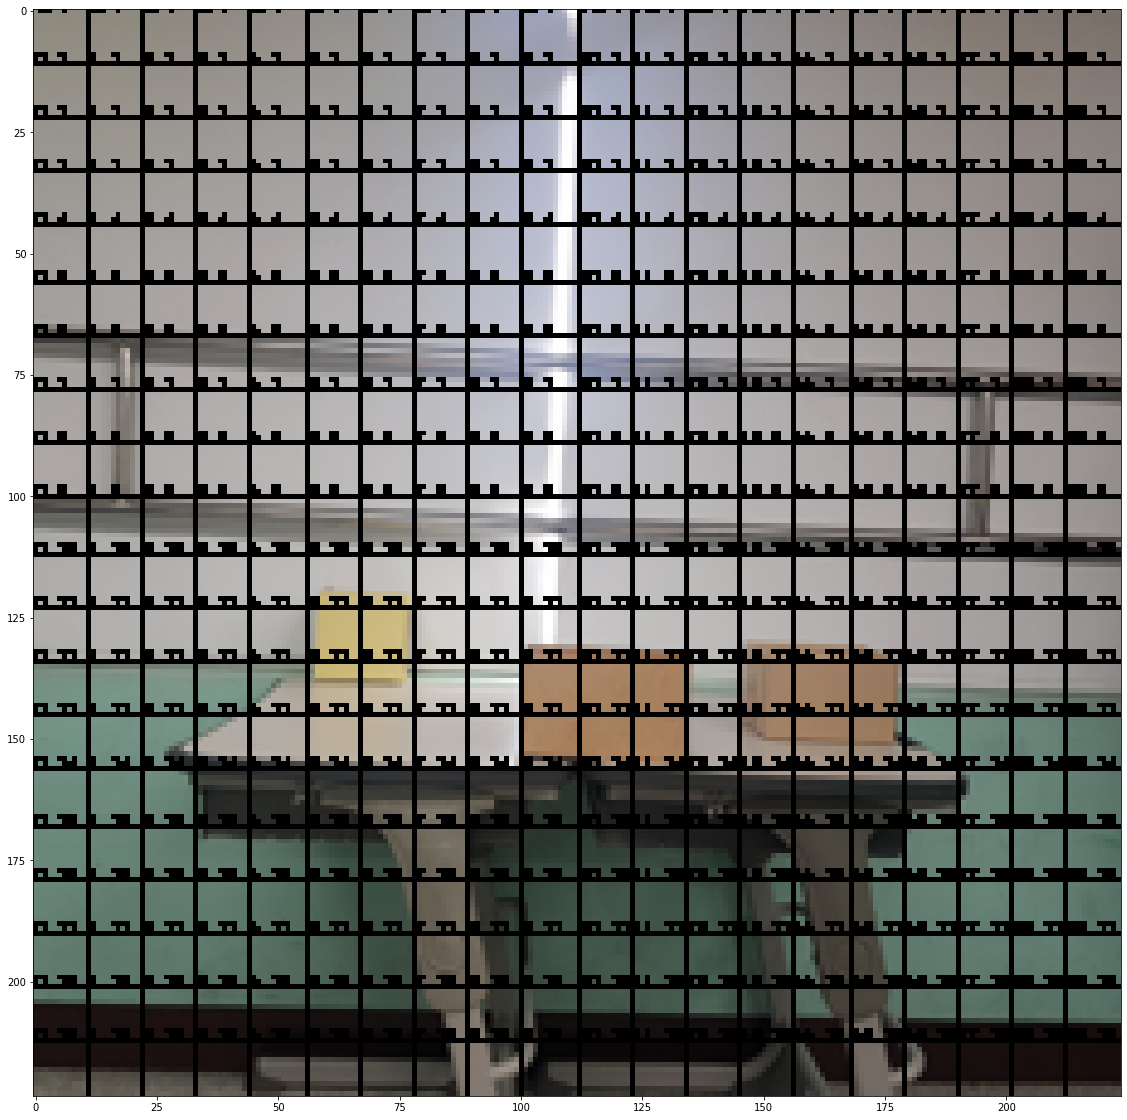

In [ ]:
tmp_picture = picture_data()
img, grid = tmp_picture.__getitem__(0)
img = np.transpose(img, [1,2,0])
bb = grid2coord(grid, img = img)
plt.rcParams["figure.figsize"] = (20,20)
plt.imshow(bb)
plt.show()

In [ ]:
class resnet18_pt(nn.Module):
    def __init__(self, grid_size = 20):
        super().__init__()
        self.grid_size = grid_size

        pt_resnet18 = resnet18(pretrained=True)# Automatically download trained parameters
        self.fe1 = nn.Sequential(*list(pt_resnet18.children())[:-2])
        self.fe2 = nn.Sequential(
                nn.Conv2d(512, 1024, 3, padding=1),
                nn.ReLU(),
                nn.Conv2d(1024, 1024, 3, padding=1),
                nn.ReLU(),
                nn.Flatten(),
                nn.Linear(1024*7*7, 2048),
                nn.ReLU()
        )

        self.distance = nn.Linear(2048, 1*self.grid_size*self.grid_size)

    def forward(self, x):   #여기서 안 됨
        
        x = self.fe1(x)
        x = self.fe2(x) 
        
        dist = self.distance(x) 

        dist = dist.view(-1, 1, 1, self.grid_size, self.grid_size)

        return dist


In [ ]:
def loss(X,dist):
    loss = T.sum((X - dist)**2, dim=[-1,-2])
    loss = T.mean(loss)
    return loss

In [ ]:
name = '안녕하세요 쿠쿠입니다.'

In [ ]:
#여기서 일정 epoch마다 걍 T.save 하자

In [ ]:
def train():
    global name

    device = 'cuda'

    model = resnet18_pt()
    model = model.cuda()

    learning_rate = 1e-2

    print('-='*40)
    trainsets = picture_data(train = True)
    trainloader = data.DataLoader(trainsets, batch_size=1, shuffle=True)

    opt = optim.Adam(model.parameters(), lr = learning_rate)
    model.train(True)

    print()
    max_epoch = 100
    for epoch in range(1,max_epoch+1):
        ls = []
        for i, (img, dist) in enumerate(trainloader):
            dist = T.as_tensor(dist,dtype=T.float32, device=device)
            img = T.as_tensor(img,dtype=T.float32, device=device)

            X_dist = model(img)

            los = loss(X_dist, dist)

            opt.zero_grad()
            los.backward()
            opt.step()

            ls.append(los.item())

            # text = f' step: {i+1:4d}/{datasets.__len__() // 1:4d} | bbox:{bbox_l.item():0.4f} | '+\
            #     f'objn:{objn_l.item():0.4f} | clss:{clss_l.item():0.4f} | total:{total_loss.item():0.4f}'
            # print(text)

        if True:
        #if epoch%10 == 0:

            print()

            ls = np.mean(ls)

            text = f' epoch: {epoch:4d}/{max_epoch:4d} | loss:{ls:0.4f} |'
            print(text)
            
            learning_rate *= 0.93 #학습이 진행되면서 점점 세밀하게 이동하도록 설정

            img_p = img.detach().cpu().numpy()[0].copy()
            img_p = np.transpose(img_p, [1,2,0])
            dist_p = X_dist.detach().cpu().numpy()[0]

            img_t = img.detach().cpu().numpy()[0].copy()
            img_t = np.transpose(img_t, [1,2,0])
            dist_t = dist.detach().cpu().numpy()[0]

            true_img = grid2coord(dist_t, img = img_t)
                # true_img = cv2.resize(true_img, (600,600))
                # true_img = np.transpose(true_img, [2,0,1])
            pred_img = grid2coord(dist_p, img = img_p)
                # pred_img = cv2.resize(pred_img, (600,600))
                # pred_img = np.transpose(pred_img, [2,0,1])
            plt.subplot(131)
            plt.imshow(pred_img)
            plt.subplot(132)
            plt.imshow(true_img)
            plt.show()

            print(X_dist) #asdf


    T.save(model.state_dict(), '/content/drive/Shareddrives/Science_Research/model/model_xml_file_ver_{0}.xml'.format(name))


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


 epoch:    1/ 100 | loss:120733369562.3380 |


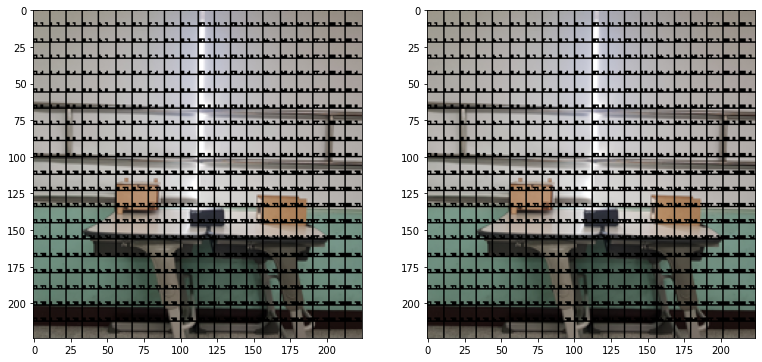

tensor([[[[[174.9047, 173.6224, 173.8661, 173.8688, 174.4407, 174.6898,
            174.3430, 174.2785, 173.9122, 174.1105, 178.2155, 174.4049,
            173.3421, 174.1412, 173.5302, 173.4053, 174.8278, 174.3458,
            173.9578, 173.0014],
           [173.1082, 172.5561, 178.2517, 174.3892, 173.6164, 174.6413,
            172.9826, 171.5796, 173.1833, 173.2239, 172.6685, 174.9852,
            176.1139, 171.8853, 173.1781, 171.4873, 173.5668, 175.4922,
            174.8529, 175.5332],
           [172.7035, 177.1775, 173.5094, 174.9309, 171.9904, 174.7825,
            175.3680, 174.8195, 171.8223, 175.5603, 170.1154, 172.1758,
            172.0852, 184.0552, 174.0036, 174.0343, 173.2075, 174.4545,
            174.0594, 173.9285],
           [174.5479, 173.8986, 171.9977, 175.1723, 172.9514, 174.4759,
            174.3656, 175.5781, 174.5749, 172.2900, 118.6947, 117.4130,
            120.7247, 141.3257, 173.2263, 172.9745, 176.4206, 171.5627,
            173.6477, 173.6268],
    

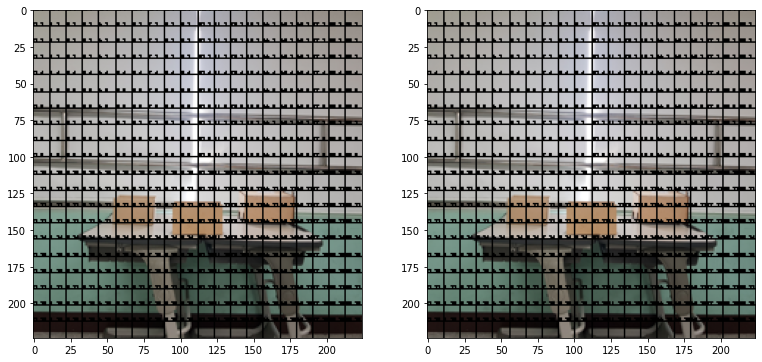

tensor([[[[[203.1559, 202.5296, 202.4441, 203.8279, 204.3503, 203.0615,
            203.8046, 202.2890, 203.4179, 203.4009, 202.9321, 202.5083,
            203.0818, 202.3083, 202.8831, 201.4732, 203.2181, 202.8743,
            203.5118, 201.6921],
           [202.5895, 201.5184, 203.3115, 202.6492, 202.7340, 202.5387,
            201.9894, 202.8096, 202.8619, 202.8350, 202.1442, 203.7279,
            202.4154, 202.4216, 202.1346, 202.3611, 203.5543, 202.6009,
            203.4286, 202.8372],
           [202.7126, 202.7130, 203.0445, 202.9349, 202.3448, 203.9795,
            202.1197, 203.1635, 203.0888, 202.1178, 172.5509, 173.8989,
            172.0517, 170.8084, 203.6405, 201.6887, 203.2388, 203.0267,
            204.4973, 202.1273],
           [202.6549, 203.2500, 202.1437, 202.2164, 203.2151, 203.5252,
            202.5865, 203.0279, 203.2342, 202.7680, 179.0385, 178.3140,
            179.1570, 186.5365, 203.3113, 202.5260, 202.8226, 202.0488,
            201.8873, 202.6934],
    

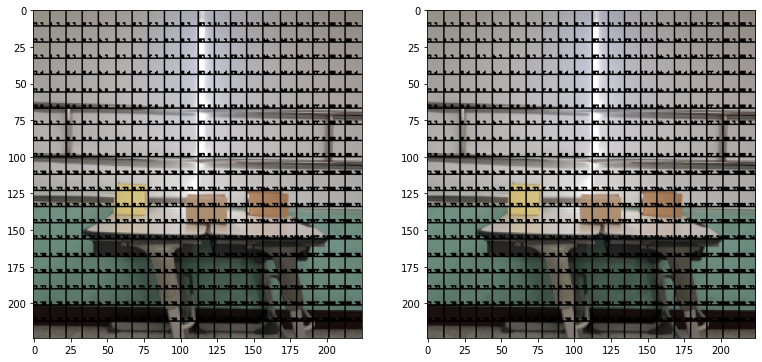

tensor([[[[[221.9933, 222.9312, 219.6367, 223.3102, 219.2909, 220.7797,
            224.4489, 223.1360, 226.5967, 224.2228, 220.3605, 221.4315,
            222.5202, 218.5977, 225.4924, 222.3667, 224.0326, 225.9723,
            220.3984, 220.6223],
           [221.7570, 221.7119, 224.8729, 223.4383, 219.7238, 222.4879,
            220.0078, 225.3111, 221.3923, 220.2466, 224.6926, 224.4740,
            219.2711, 222.5104, 225.3142, 223.6685, 221.2902, 222.1619,
            221.9950, 223.4036],
           [222.8763, 219.5844, 223.3868, 222.7843, 222.4237, 221.0439,
            219.0912, 222.5533, 224.3827, 219.8279, 213.7934, 214.5866,
            213.5743, 214.7509, 222.0894, 221.0828, 220.8218, 220.9257,
            223.4177, 221.8321],
           [226.5957, 226.9600, 221.9016, 223.2664, 224.4866, 223.8336,
            219.6176, 216.4939, 221.9615, 221.3472, 190.0788, 188.5053,
            188.2408, 199.8321, 225.3677, 221.7409, 219.0757, 220.7012,
            221.0467, 222.2149],
    

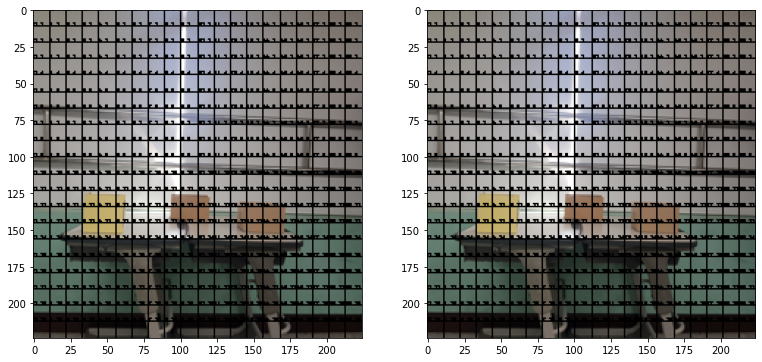

tensor([[[[[202.2843, 203.5208, 205.0639, 200.0037, 200.8526, 202.9815,
            200.7467, 201.2854, 200.8334, 200.9419, 202.9264, 202.6593,
            200.2725, 204.1549, 201.8782, 206.3156, 200.4294, 200.1556,
            199.7818, 203.1323],
           [205.6467, 203.1504, 198.8114, 203.3629, 204.1007, 205.1968,
            202.3198, 199.9598, 204.5083, 202.6620, 203.1095, 199.4675,
            202.9164, 200.2830, 201.4203, 201.2828, 200.6952, 204.1407,
            200.9200, 202.2126],
           [202.2129, 202.8137, 202.0561, 201.2854, 201.6598, 200.5578,
            206.4757, 202.0599, 200.9071, 204.5672, 199.1263, 197.8656,
            197.9714, 198.9542, 201.3405, 203.8221, 201.4093, 202.1767,
            200.3752, 203.8229],
           [199.9786, 199.7386, 202.7285, 204.3850, 201.8142, 202.9848,
            203.9731, 204.0215, 202.3331, 199.5659, 170.7176, 171.3376,
            171.0839, 178.4103, 200.3669, 203.2781, 204.9769, 201.3079,
            203.6884, 203.2542],
    

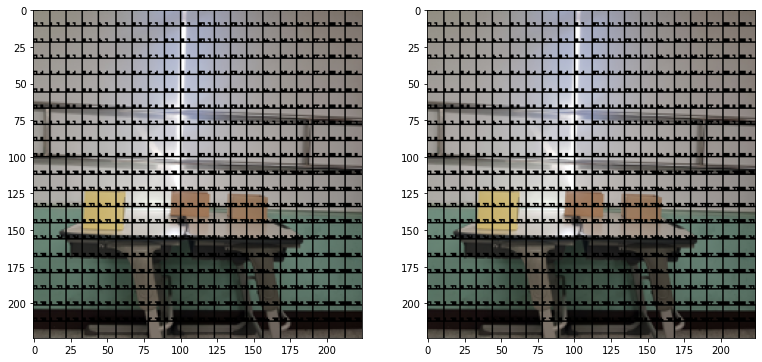

tensor([[[[[197.4442, 199.3483, 200.1830, 195.6133, 196.6274, 197.7749,
            194.8972, 196.4019, 195.1911, 195.5114, 198.4610, 197.3454,
            194.9825, 199.9183, 197.2012, 202.0430, 195.1515, 194.6113,
            193.8178, 198.4756],
           [200.8406, 198.8405, 192.8725, 198.3466, 198.8283, 200.1696,
            198.2148, 194.1593, 199.7202, 198.0843, 198.1082, 194.2056,
            197.9821, 194.6291, 196.1387, 195.5842, 195.2307, 199.8767,
            195.8556, 197.1864],
           [196.9448, 198.4790, 197.2944, 196.2028, 197.4503, 195.6490,
            201.9047, 197.8456, 195.3604, 200.0816, 189.1475, 183.6136,
            185.7221, 188.1897, 197.4821, 199.2834, 196.7490, 197.2453,
            195.1236, 198.7287],
           [193.9295, 193.8444, 197.7172, 199.5874, 196.2083, 198.0066,
            199.4266, 199.7033, 197.2059, 194.2374, 143.1047, 146.4197,
            143.0675, 160.8089, 194.4615, 198.3935, 199.8685, 196.6492,
            199.4846, 198.2427],
    

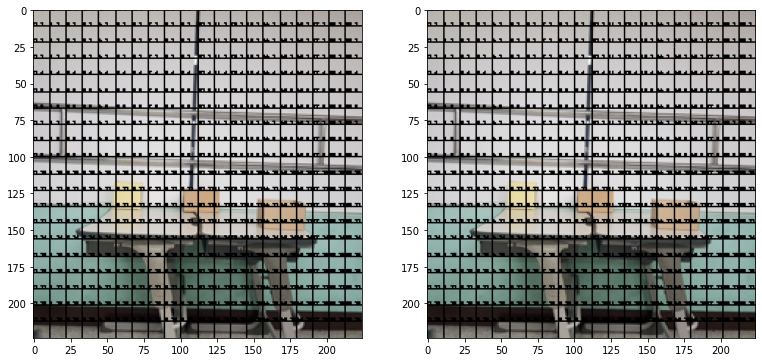

tensor([[[[[193.3360, 192.7647, 193.3210, 193.0153, 192.8562, 193.6732,
            194.1385, 193.3513, 194.0628, 193.6873, 193.0236, 193.7105,
            193.7467, 192.5852, 193.2649, 192.7558, 193.8398, 193.9343,
            194.2821, 193.1564],
           [193.2087, 192.8705, 194.0549, 193.5230, 193.6562, 193.4417,
            192.7290, 194.0404, 193.2635, 193.0653, 193.4824, 193.6623,
            193.4870, 193.9112, 193.6441, 194.1832, 193.8465, 192.8166,
            193.5261, 193.4137],
           [193.7301, 192.8786, 193.2725, 193.4386, 192.7036, 193.4787,
            192.9421, 192.7527, 194.0376, 193.0777, 191.8549, 192.7393,
            192.3904, 192.1263, 192.4529, 193.0507, 193.1728, 193.4504,
            193.8047, 193.5851],
           [194.2516, 194.1783, 193.5224, 193.2423, 193.9572, 193.4750,
            192.9983, 192.8179, 193.6565, 193.8256, 154.5569, 153.2485,
            153.8882, 158.6870, 194.1758, 193.4502, 193.4767, 193.1987,
            192.7576, 193.4491],
    

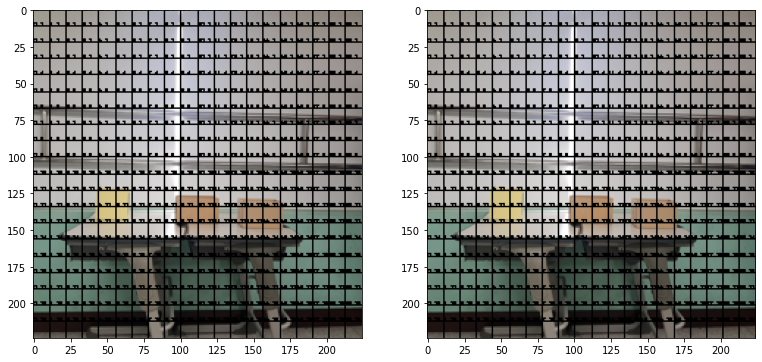

tensor([[[[[194.7082, 194.2209, 195.6230, 194.0214, 194.0191, 195.5329,
            195.9411, 194.8489, 195.6785, 195.3379, 194.6017, 195.5645,
            195.1778, 194.1490, 194.5102, 194.7807, 195.5235, 195.4222,
            196.0815, 194.9612],
           [195.3875, 194.4120, 195.1895, 195.6000, 195.7096, 195.7726,
            193.8972, 195.3780, 195.3651, 194.5383, 195.4971, 194.8614,
            195.4180, 195.3651, 195.3006, 196.1942, 195.5503, 194.4670,
            195.0618, 195.2536],
           [195.4709, 194.4802, 194.9246, 194.7101, 194.0076, 194.9379,
            195.1659, 193.9656, 195.9804, 195.1032, 163.3464, 162.7337,
            163.0571, 163.3783, 193.1867, 195.0000, 194.8725, 195.3577,
            195.2944, 195.5040],
           [195.9493, 195.6233, 195.3308, 195.2153, 195.5934, 195.2269,
            194.7644, 194.5744, 195.4893, 194.9579, 163.1884, 163.4449,
            163.2127, 168.8351, 195.7900, 195.1703, 195.7118, 194.7732,
            194.3466, 195.1933],
    

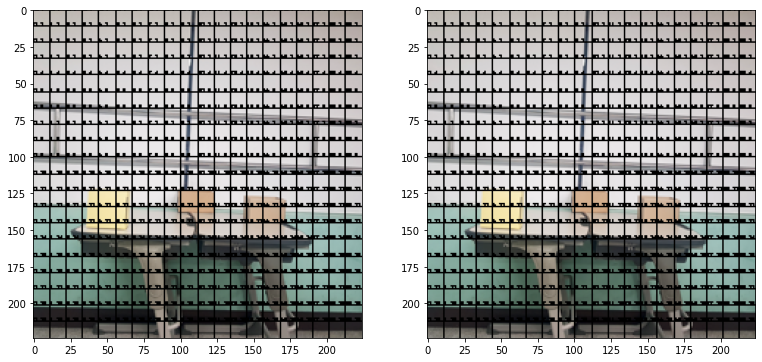

tensor([[[[[201.7698, 202.0055, 202.2467, 202.2301, 202.2321, 201.9117,
            202.2016, 202.2978, 201.9739, 202.3153, 202.1157, 202.0027,
            202.1381, 202.1400, 201.7841, 201.9993, 202.2303, 202.1581,
            202.3806, 202.1825],
           [202.0288, 202.0948, 202.2323, 202.2590, 201.8592, 202.1776,
            201.9588, 202.0210, 202.1955, 201.9915, 202.3201, 202.2841,
            202.1808, 202.1402, 202.1554, 202.1972, 202.3035, 202.0202,
            202.2346, 202.3442],
           [201.9808, 202.2461, 202.2407, 201.9069, 202.4067, 202.2579,
            202.0716, 202.0731, 202.3626, 202.1944, 196.0217, 196.0271,
            195.7297, 195.8615, 202.0052, 202.3463, 202.5261, 202.3831,
            202.0798, 201.8620],
           [202.2831, 202.0724, 202.0487, 201.9488, 201.7748, 201.9661,
            202.1046, 202.1058, 202.1235, 201.8919, 178.2488, 178.0252,
            178.4110, 185.9009, 202.0819, 201.8865, 202.0376, 202.4540,
            202.0992, 201.8396],
    

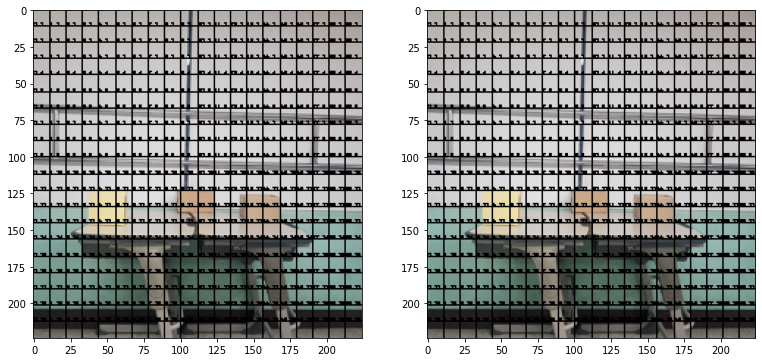

tensor([[[[[205.4257, 205.4583, 205.5760, 205.4803, 205.4968, 205.4960,
            205.5735, 205.5567, 205.4998, 205.5935, 205.5125, 205.5210,
            205.5191, 205.4897, 205.4144, 205.4853, 205.5529, 205.5319,
            205.6131, 205.5482],
           [205.5278, 205.4905, 205.5593, 205.5663, 205.5003, 205.5602,
            205.4332, 205.5014, 205.5504, 205.4817, 205.5626, 205.5429,
            205.5517, 205.5444, 205.5471, 205.5772, 205.5826, 205.4789,
            205.5491, 205.5788],
           [205.5000, 205.5435, 205.5354, 205.4696, 205.5554, 205.5338,
            205.5285, 205.4806, 205.5972, 205.5356, 178.0704, 177.9435,
            178.2330, 177.8843, 205.4105, 205.5552, 205.5761, 205.5728,
            205.5090, 205.4890],
           [205.5951, 205.5170, 205.5165, 205.5056, 205.4533, 205.4911,
            205.5080, 205.5200, 205.5318, 205.4473, 181.7766, 181.6092,
            181.5160, 183.5984, 205.5349, 205.4685, 205.5468, 205.5695,
            205.4948, 205.4731],
    

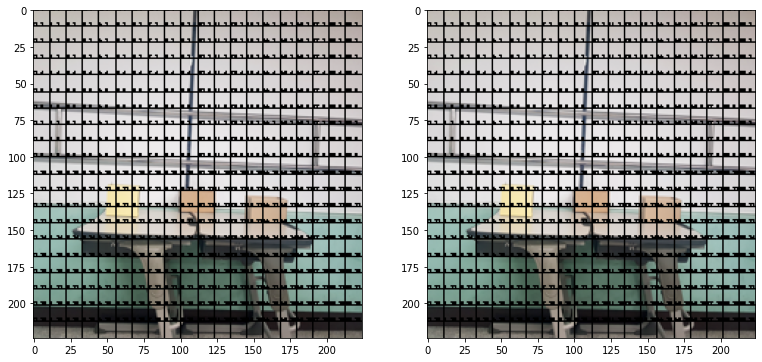

tensor([[[[[199.3639, 199.2545, 199.1143, 199.2335, 199.2139, 199.2628,
            199.1646, 199.2039, 199.2534, 199.1660, 199.3035, 199.1867,
            199.2086, 199.1927, 199.3574, 199.2442, 199.1239, 199.2127,
            199.0979, 199.2404],
           [199.1790, 199.2116, 199.2461, 199.1086, 199.2497, 199.1357,
            199.2972, 199.3022, 199.1341, 199.2994, 199.0968, 199.2154,
            199.2159, 199.2483, 199.2003, 199.1141, 199.1455, 199.2593,
            199.1819, 199.1244],
           [199.2428, 199.2263, 199.1589, 199.3809, 199.1987, 199.1691,
            199.1798, 199.3047, 199.0910, 199.1769, 202.2413, 202.3985,
            202.3683, 202.5379, 199.3867, 199.0933, 199.0733, 199.0818,
            199.2026, 199.2383],
           [199.1560, 199.2462, 199.2333, 199.2608, 199.3657, 199.2393,
            199.1964, 199.2320, 199.2083, 199.3161, 174.2224, 174.2519,
            175.4263, 187.8589, 199.2339, 199.2519, 199.1642, 199.1241,
            199.2579, 199.3080],
    

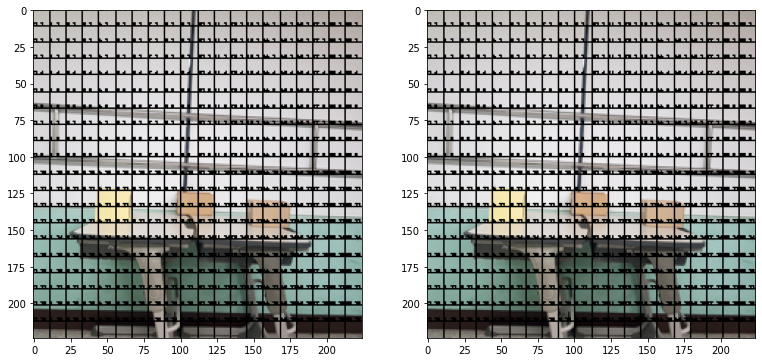

tensor([[[[[207.8737, 207.4246, 206.2940, 207.0305, 207.0008, 207.1935,
            206.3778, 206.6118, 207.0219, 206.3668, 207.1804, 206.8862,
            206.8029, 207.0934, 207.9022, 207.2438, 206.3705, 206.6993,
            205.8927, 206.8474],
           [206.8826, 207.1274, 206.6959, 206.2657, 207.2099, 206.4136,
            207.6813, 207.1088, 206.5030, 207.4216, 206.1621, 206.6457,
            206.6675, 206.8100, 206.7213, 206.2049, 206.2811, 207.3272,
            206.6192, 206.2559],
           [207.0556, 206.8613, 206.6055, 207.6428, 206.6681, 206.5887,
            206.8773, 207.4602, 205.9348, 206.6688, 195.2688, 195.5006,
            195.3535, 195.6354, 207.9451, 206.2575, 205.9342, 206.0578,
            206.8608, 207.2537],
           [206.2191, 206.8494, 206.9608, 207.2243, 207.5908, 207.1535,
            206.9730, 207.0945, 206.7335, 207.4978, 175.3734, 175.3668,
            175.6133, 174.0525, 206.7614, 207.3393, 206.7340, 206.2052,
            207.2196, 207.5041],
    

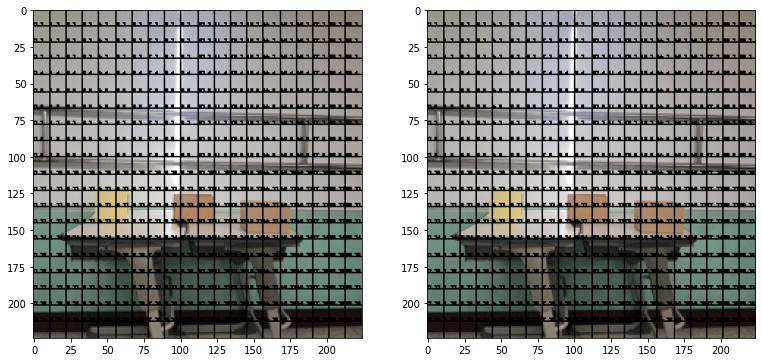

tensor([[[[[195.2669, 195.2989, 195.3744, 195.3092, 195.3244, 195.3241,
            195.3749, 195.3581, 195.3243, 195.3857, 195.3233, 195.3424,
            195.3375, 195.3247, 195.2592, 195.3153, 195.3611, 195.3447,
            195.3990, 195.3546],
           [195.3468, 195.3221, 195.3589, 195.3682, 195.3274, 195.3658,
            195.2790, 195.3206, 195.3606, 195.3078, 195.3665, 195.3488,
            195.3592, 195.3529, 195.3564, 195.3759, 195.3796, 195.3109,
            195.3582, 195.3773],
           [195.3245, 195.3498, 195.3510, 195.2941, 195.3561, 195.3486,
            195.3466, 195.3054, 195.3875, 195.3497, 168.2144, 168.1950,
            168.5551, 168.4877, 195.2453, 195.3630, 195.3762, 195.3734,
            195.3325, 195.3197],
           [195.3892, 195.3345, 195.3357, 195.3295, 195.2876, 195.3190,
            195.3336, 195.3386, 195.3460, 195.2822, 137.3683, 137.4190,
            137.2863, 144.8657, 195.3484, 195.3047, 195.3588, 195.3707,
            195.3190, 195.3056],
    

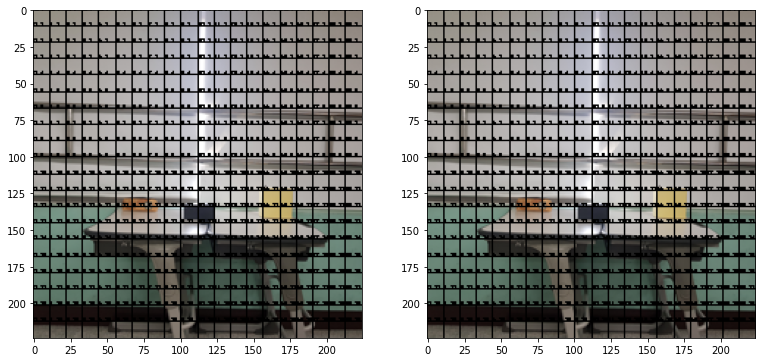

tensor([[[[[204.6760, 204.6873, 204.6174, 204.6632, 204.6581, 204.6407,
            204.5953, 204.6058, 204.6356, 204.5827, 204.6193, 204.6494,
            204.6347, 204.6805, 204.6893, 204.6643, 204.6320, 204.6196,
            204.5753, 204.6033],
           [204.6502, 204.6714, 204.5907, 204.6259, 204.6460, 204.6226,
            204.6954, 204.6193, 204.6364, 204.6488, 204.6282, 204.6118,
            204.6019, 204.5997, 204.6149, 204.6096, 204.5943, 204.6647,
            204.6173, 204.6056],
           [204.6434, 204.6159, 204.6378, 204.6302, 204.6131, 204.6329,
            204.6492, 204.6503, 204.5925, 204.6322, 194.8228, 194.7286,
            194.8330, 194.7368, 204.6866, 204.6429, 204.6145, 204.6216,
            204.6472, 204.6648],
           [204.5774, 204.6208, 204.6318, 204.6385, 204.6411, 204.6572,
            204.6584, 204.6383, 204.6223, 204.6679, 168.0114, 168.6114,
            168.4786, 169.5318, 204.6086, 204.6768, 204.6357, 204.6107,
            204.6501, 204.6507],
    

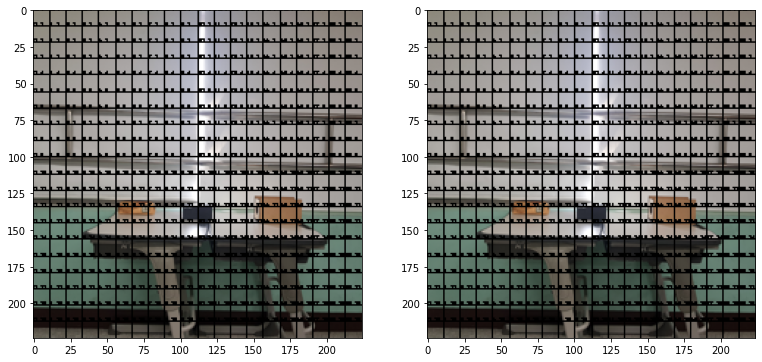

tensor([[[[[199.7287, 199.6035, 199.4141, 199.5927, 199.5540, 199.5976,
            199.4850, 199.5357, 199.5997, 199.4754, 199.6459, 199.5077,
            199.5472, 199.5240, 199.7284, 199.5829, 199.4399, 199.5548,
            199.4117, 199.5644],
           [199.4929, 199.5462, 199.5835, 199.4161, 199.5785, 199.4469,
            199.6583, 199.6554, 199.4433, 199.6414, 199.4098, 199.5605,
            199.5443, 199.5806, 199.5211, 199.4228, 199.4613, 199.6005,
            199.5041, 199.4333],
           [199.5830, 199.5497, 199.4822, 199.7300, 199.5248, 199.5012,
            199.4945, 199.6485, 199.4054, 199.5022, 193.1889, 193.2207,
            193.6763, 193.6828, 199.7690, 199.3968, 199.3829, 199.3859,
            199.5410, 199.5714],
           [199.4765, 199.5954, 199.5665, 199.5872, 199.7230, 199.5788,
            199.5239, 199.5530, 199.5430, 199.6828, 186.7401, 184.1226,
            183.9058, 182.5447, 199.5714, 199.5982, 199.4703, 199.4489,
            199.5958, 199.6492],
    

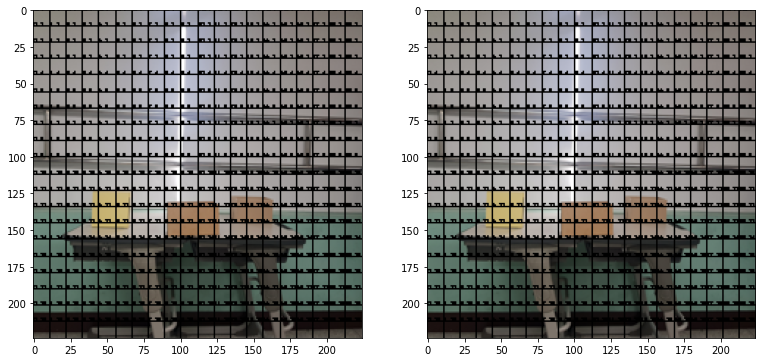

tensor([[[[[250.5967, 251.1085, 247.6185, 250.0151, 251.3573, 249.8621,
            246.1786, 250.1235, 250.0596, 248.9209, 248.3927, 250.1856,
            248.5717, 250.0005, 250.9493, 249.8417, 248.8876, 249.8572,
            246.6910, 249.5709],
           [251.0787, 251.7691, 248.5634, 250.9110, 250.1771, 250.0134,
            249.4801, 251.9720, 249.0655, 247.2576, 248.9319, 249.8720,
            247.9936, 247.5094, 245.7801, 247.0365, 247.8923, 250.5096,
            248.5147, 245.5374],
           [251.2977, 248.3405, 248.6395, 249.9271, 249.0283, 246.4870,
            249.4615, 249.3628, 247.8429, 249.0787, 246.2063, 247.5529,
            247.7332, 247.9565, 248.7863, 248.8521, 246.2371, 247.0950,
            248.6267, 247.6653],
           [246.7228, 249.7401, 250.4728, 251.4227, 251.1373, 251.5356,
            249.7151, 249.3976, 248.4585, 250.2407, 240.0935, 241.5858,
            240.3894, 238.9887, 249.0312, 248.6108, 249.1235, 249.6638,
            251.1814, 251.3817],
    

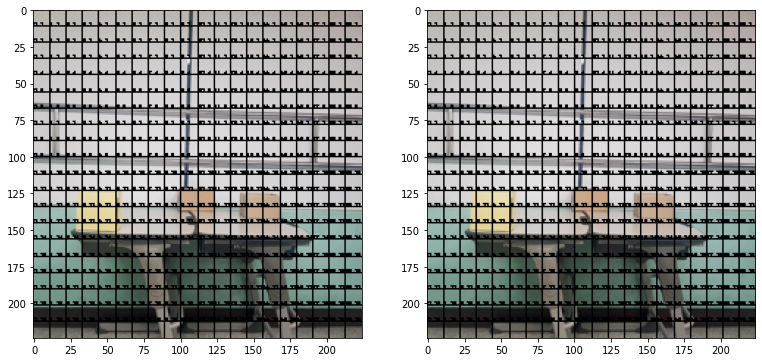

tensor([[[[[207.5779, 207.2326, 206.9346, 207.1214, 206.9583, 207.2392,
            208.1387, 206.7335, 207.2244, 206.7414, 207.5443, 207.1586,
            207.4389, 207.3711, 207.4051, 208.0801, 206.8929, 207.2978,
            207.0325, 207.2581],
           [206.7915, 207.0514, 207.1120, 206.3995, 207.5631, 207.0280,
            207.4160, 206.8719, 206.8385, 208.6071, 206.7605, 206.8044,
            207.1083, 207.7867, 207.9652, 207.3850, 207.7958, 207.4239,
            208.0135, 207.6799],
           [206.8435, 207.6141, 207.0601, 207.3251, 206.8672, 207.7260,
            206.9186, 207.6262, 206.5856, 207.6737, 199.8791, 200.0457,
            200.4596, 200.6093, 207.6690, 206.8653, 207.5340, 208.0220,
            207.3737, 208.3294],
           [206.9096, 207.1339, 206.7370, 206.8873, 207.3007, 206.9098,
            207.2942, 207.4777, 207.6887, 207.3919, 174.1289, 174.4460,
            174.0423, 183.8468, 207.8692, 208.1661, 206.8403, 206.7296,
            207.1097, 207.2408],
    

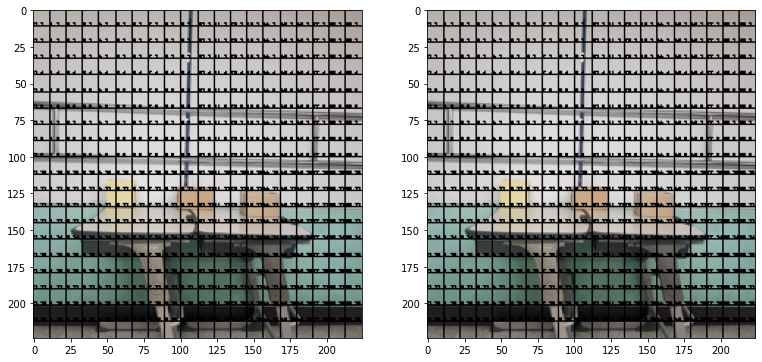

tensor([[[[[201.1600, 200.8522, 200.0922, 200.5796, 200.5470, 200.7037,
            200.2712, 200.3134, 200.6105, 200.1544, 200.7580, 200.4897,
            200.4874, 200.6293, 201.1501, 200.8184, 200.1502, 200.4223,
            199.8897, 200.5203],
           [200.4601, 200.6340, 200.3917, 200.0166, 200.7436, 200.1929,
            201.0114, 200.6299, 200.2200, 200.9525, 199.9841, 200.3229,
            200.3867, 200.5513, 200.4695, 200.0915, 200.1951, 200.8065,
            200.4135, 200.1447],
           [200.5738, 200.5452, 200.3028, 201.0022, 200.3369, 200.3643,
            200.4430, 200.9299, 199.8329, 200.4164, 181.0970, 180.9743,
            179.7945, 179.7267, 201.2114, 200.0489, 199.9162, 200.0070,
            200.5089, 200.8126],
           [200.0777, 200.4969, 200.4940, 200.6866, 200.9942, 200.6262,
            200.5603, 200.6747, 200.4689, 200.9162, 172.9800, 172.9401,
            173.5635, 188.7064, 200.5207, 200.8551, 200.3438, 200.0391,
            200.7195, 200.9148],
    

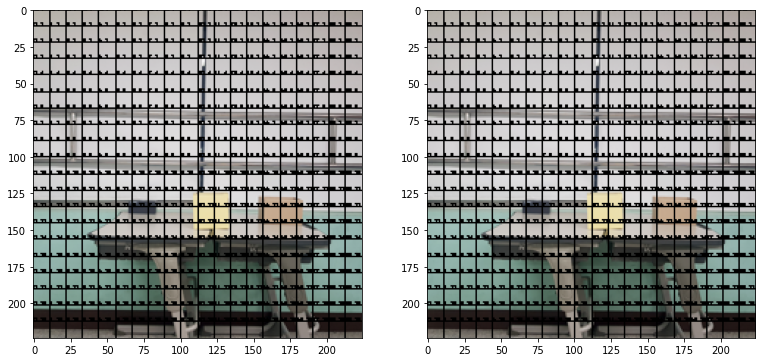

tensor([[[[[196.2455, 196.3252, 196.5029, 196.3993, 196.4190, 196.3625,
            196.3985, 196.5051, 196.3826, 196.5243, 196.3278, 196.3984,
            196.3854, 196.3416, 196.2889, 196.2677, 196.4963, 196.4196,
            196.5556, 196.4021],
           [196.4453, 196.3833, 196.4624, 196.5741, 196.3144, 196.4746,
            196.2799, 196.4596, 196.4807, 196.2016, 196.5443, 196.4992,
            196.4445, 196.3596, 196.3529, 196.4740, 196.4377, 196.3114,
            196.3708, 196.4448],
           [196.4445, 196.3584, 196.4493, 196.3347, 196.4787, 196.3915,
            196.4424, 196.2795, 196.6069, 196.3847, 188.3407, 188.3060,
            188.1025, 188.0710, 196.2350, 196.5098, 196.5056, 196.4587,
            196.3824, 196.2402],
           [196.5318, 196.4222, 196.4843, 196.4184, 196.3255, 196.4267,
            196.3694, 196.3340, 196.3724, 196.3078, 187.8279, 187.7908,
            185.9929, 190.3028, 196.3645, 196.2417, 196.4701, 196.5413,
            196.3700, 196.3283],
    

KeyboardInterrupt: ignored

In [ ]:

plt.rcParams['figure.figsize'] = [20, 10]
train()


In [ ]:
def test():
    global name

    device = 'cuda'

    model = resnet18_pt()
    PATH = '/content/drive/Shareddrives/Science_Research/model/model_xml_file_ver_{0}.xml'.format(name)
    model.load_state_dict(T.load(PATH))
    model.eval()
    model = model.cuda()

    print('-='*40)
    trainsets = picture_data(train = False, first = 351, last = 410)
    trainloader = data.DataLoader(trainsets, batch_size=1, shuffle=False)

    print()

    ls = []
    
    for i, (img, dist) in enumerate(trainloader):
            dist = T.as_tensor(dist,dtype=T.float32, device=device)
            img = T.as_tensor(img,dtype=T.float32, device=device)

            X_dist = model(img)

            los = loss(X_dist, dist)

            ls = los.item()

            # text = f' step: {i+1:4d}/{datasets.__len__() // 1:4d} | bbox:{bbox_l.item():0.4f} | '+\
            #     f'objn:{objn_l.item():0.4f} | clss:{clss_l.item():0.4f} | total:{total_loss.item():0.4f}'
            # print(text)


            text = f' loss:{ls:0.4f}'
            print(text)
                    

            img_p = img.detach().cpu().numpy()[0].copy()
            img_p = np.transpose(img_p, [1,2,0])
            dist_p = X_dist.detach().cpu().numpy()[0]

            img_t = img.detach().cpu().numpy()[0].copy()
            img_t = np.transpose(img_t, [1,2,0])
            dist_t = dist.detach().cpu().numpy()[0]

            true_img = grid2coord(dist_t, img = img_t)
                        # true_img = cv2.resize(true_img, (600,600))
                        # true_img = np.transpose(true_img, [2,0,1])
            pred_img = grid2coord(dist_p, img = img_p)
                        # pred_img = cv2.resize(pred_img, (600,600))
                        # pred_img = np.transpose(pred_img, [2,0,1])
                        # plt.imshow(cat_img)
            plt.subplot(131)
            plt.imshow(pred_img)
            plt.subplot(132)
            plt.imshow(true_img)
            plt.show()
            

In [ ]:
test()